In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('datasets\sales_data.csv')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [ ]:
# Question 1:

total_sales_by_products = df.groupby('Product Category')['Total Revenue'].sum()
print(total_sales_by_products)

Product Category
Beauty Products     2621.90
Books               1861.93
Clothing            8128.93
Electronics        34982.41
Home Appliances    18646.16
Sports             14326.52
Name: Total Revenue, dtype: float64


<Axes: xlabel='Product Category'>

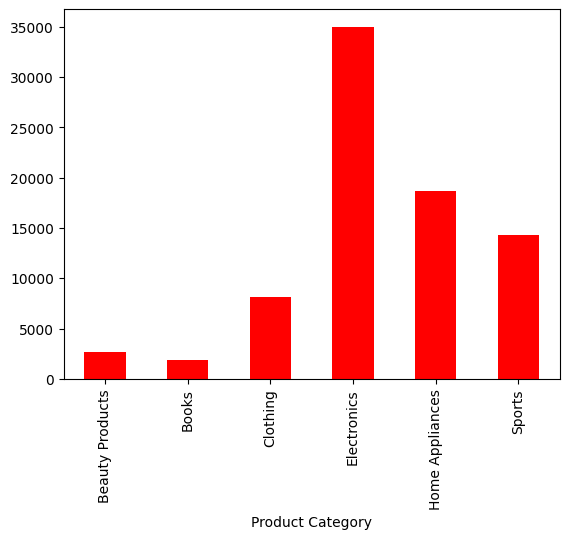

In [14]:
total_sales_by_products.plot(kind='bar',color='red')

In [21]:
df['Date_M'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Date_M
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024-01-01
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024-01-02
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024-01-03
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024-01-04
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024-01-05


In [24]:
df['Month'] = df['Date_M'].dt.to_period('M')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Date_M,Month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024-01-01,2024-01
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024-01-02,2024-01
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024-01-03,2024-01
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024-01-04,2024-01
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024-01-05,2024-01


<Axes: >

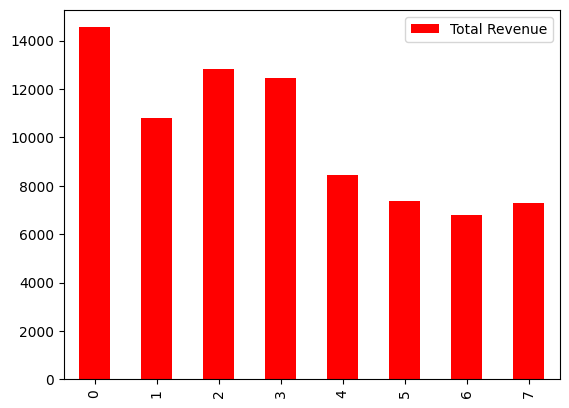

In [ ]:
# Quesetion 2: 
# Monthly Sales Trend
# Convert the Date column to datetime and plot monthly total revenue.


month_sales = df.groupby('Month')['Total Revenue'].sum().reset_index()
month_sales.plot(kind='bar', color='red')

In [33]:
monthly_cat_rev = df.groupby(['Month','Product Category'])['Total Revenue'].sum().reset_index()
top_cat = monthly_cat_rev.loc[
    monthly_cat_rev.groupby('Month')['Total Revenue'].idxmax()
]

      Month Product Category  Total Revenue
3   2024-01      Electronics        7999.90
11  2024-02           Sports        2993.87
16  2024-03  Home Appliances        5059.91
21  2024-04      Electronics        6709.91
27  2024-05      Electronics        4198.96
33  2024-06      Electronics        3599.93
39  2024-07      Electronics        2006.97
45  2024-08      Electronics        3066.96


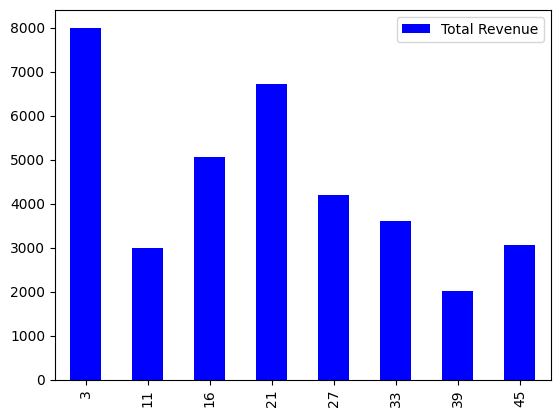

In [36]:
top_cat.plot(kind='bar', color='blue')
print(top_cat)

<BarContainer object of 8 artists>


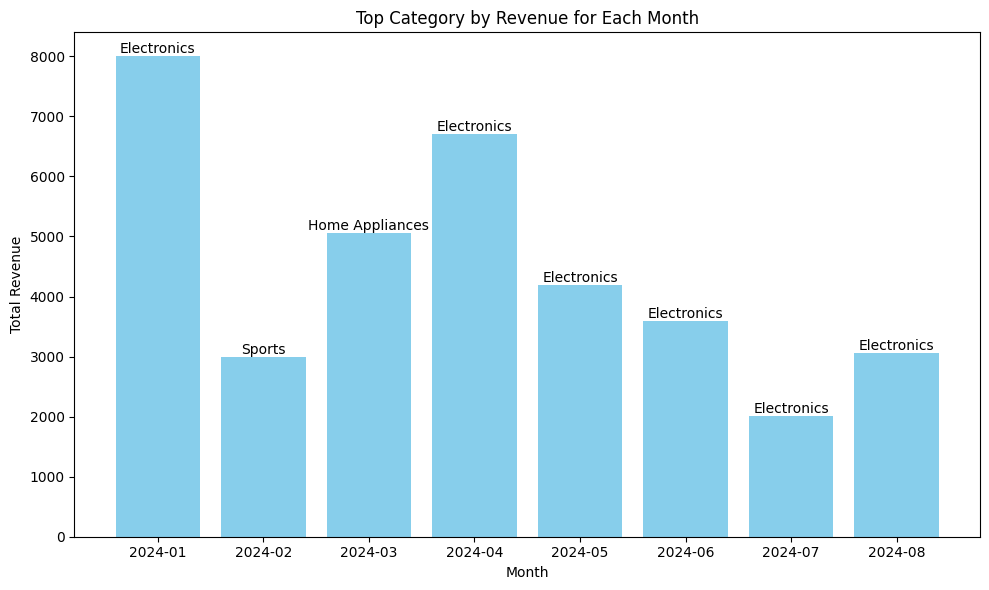

In [39]:
plt.figure(figsize=(10, 6))
bars = plt.bar(top_cat['Month'].astype(str), top_cat['Total Revenue'], color='skyblue')

print(bars)

for bar, category in zip(bars, top_cat['Product Category']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), category,
             ha='center', va='bottom', fontsize=10, rotation=0)

plt.title("Top Category by Revenue for Each Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

In [ ]:
# Question 3: Top-Selling Products
# Identify the top 5 products with the highest total revenu

top_five = df.groupby('Product Name')['Total Revenue'].sum().nlargest(5)
print(top_five)

Product Name
Canon EOS R5 Camera          3899.99
LG OLED TV                   2599.98
MacBook Pro 16-inch          2499.99
Apple MacBook Pro 16-inch    2399.00
iPhone 14 Pro                1999.98
Name: Total Revenue, dtype: float64


In [ ]:
# Question 4: Payment Method Preference by Region
# Cross-tabulate or count which Payment Method is most used per Region.

payment_method_region = df.groupby('Region')['Payment Method'].max()
print(payment_method_region)

Region
Asia              Debit Card
Europe                PayPal
North America    Credit Card
Name: Payment Method, dtype: object


In [49]:
# Question 5: Average Unit Price per Category
# Compute and visualize the average Unit Price for each Product Category.
aupc = df.groupby('Product Category')['Unit Price'].mean()
print(aupc)

Product Category
Beauty Products     61.6230
Books               16.1530
Clothing            67.5365
Electronics        691.5915
Home Appliances    320.1855
Sports             261.2840
Name: Unit Price, dtype: float64


([<matplotlib.patches.Wedge at 0x1e17042db50>,
 [Text(0.7045828332132213, -0.8447266014168312, 'Asia'),
  Text(-0.9313561713620618, -0.5852996515168978, 'Europe'),
  Text(0.1470905536859262, 1.0901212634456627, 'North America')],
 [Text(0.3843179090253934, -0.46075996440918054, '27.9%'),
  Text(-0.5080124571065792, -0.3192543553728533, '26.4%'),
  Text(0.08023121110141428, 0.5946115982430886, '45.7%')])

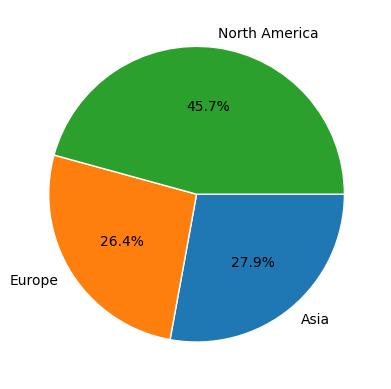

In [ ]:
# Question 6: Pie Chart of Revenue by Region
# Show how much each Region contributes to total revenue using a pie chart.

rbr = df.groupby('Region')['Total Revenue'].sum()
#rbr.plot(kind='pie')
plt.pie(
    rbr,
    labels=rbr.index,
    autopct='%1.1f%%',                             
    counterclock=False,                
    wedgeprops={'edgecolor': 'white'}
)


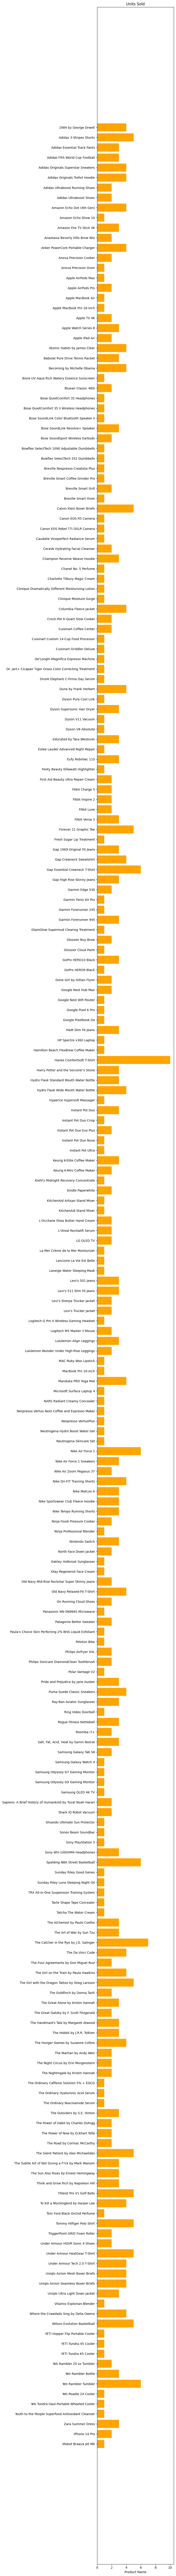

In [62]:
# Question 7: Bar Chart: Units Sold by Product
#  Plot a horizontal bar chart showing Units Sold for each product

ubp = df.groupby('Product Name')['Units Sold'].sum()
#ubp.plot(kind='bar')


plt.figure(figsize=(8, len(ubp) * 0.5))
plt.barh(ubp.index[::-1], ubp.values[::-1], color='orange')
plt.title('Units Sold')
plt.xlabel('Product Name')
plt.tight_layout()
plt.show()


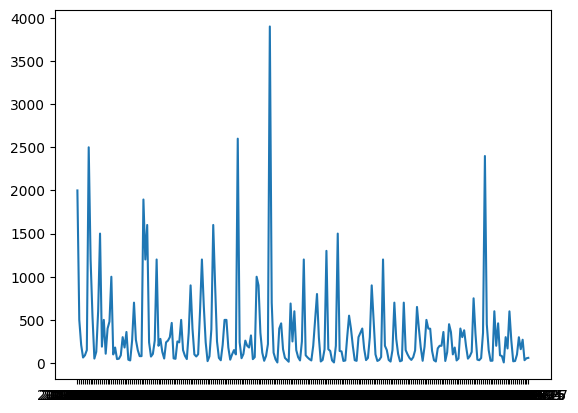

In [64]:
# Question 8: Line Plot Sales Trend Over Time
# Plot daily or weekly total revenue trend using a line chart.

sales_day = df.groupby('Date')['Total Revenue'].sum().reset_index()
plt.plot(sales_day['Date'],sales_day['Total Revenue'])

In [65]:
df['Week'] = df['Date_M'].dt.to_period('W')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Date_M,Month,Week
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024-01-01,2024-01,2024-01-01/2024-01-07
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024-01-02,2024-01,2024-01-01/2024-01-07
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024-01-03,2024-01,2024-01-01/2024-01-07
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024-01-04,2024-01,2024-01-01/2024-01-07
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024-01-05,2024-01,2024-01-01/2024-01-07


<Axes: xlabel='Week'>

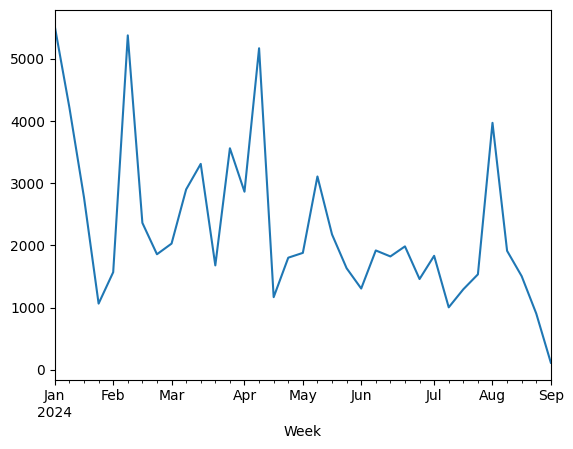

In [67]:
week_sales = df.groupby('Week')['Total Revenue'].sum()
week_sales.plot(kind='line')

In [ ]:
# Question 9: Revenue Outlier Detection
#  Use NumPy to calculate the mean and standard deviation of Total Revenue, and flag outliers (beyond 2 std deviations).


In [75]:
mean_revenue = np.mean(df['Total Revenue'])
std_revenue = np.std(df['Total Revenue'])
print(mean_revenue)
print(std_revenue)

335.699375
484.7913194570003


In [76]:
# Question 10: Revenue per Unit Metric
# Create a new column: Revenue per Unit = Total Revenue / Units Sold, and analyze which product has the highest revenue per unit.

df['Revenue per Unit'] = df['Total Revenue'] / df['Units Sold']
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Date_M,Month,Week,Revenue per Unit
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024-01-01,2024-01,2024-01-01/2024-01-07,999.99
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024-01-02,2024-01,2024-01-01/2024-01-07,499.99
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024-01-03,2024-01,2024-01-01/2024-01-07,69.99
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024-01-04,2024-01,2024-01-01/2024-01-07,15.99
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024-01-05,2024-01,2024-01-01/2024-01-07,89.99


In [84]:
highest_revenue_unit = df.loc[df['Unit Price'].idxmax()]
print(highest_revenue_unit['Product Name'])

Canon EOS R5 Camera
